# Analysis of succesfull actor profiles of over time
A successfull actor profile is defined as the actor profile of the most successfull actors in a certain genre. For simplicity and staying interesting, we have selected certain genres: ```...```. An actor profile is a subset of actor features. To limit ourselves, we have only consider these actor features: ```gender```, ```age_at_movie_start``` and```experience_at_movie_start``` (in total and for each selected genre respectively). An actor's successfullness is determined by the ordering he or she has in the cast (see column: 'ordering' in IMDB's principals data) as well as by the success of the movie the actor is playing in. As a movie success metric both - IMDB's ratings and revenue - are used.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Loading in and preparing preprocessed data

In [2]:
# import movie and actor data
# TODO get experience_so_far_per_genre into the movie-actor combi data set
movie_actor_combi = pd.read_csv("./data/actor_movie_combi.csv", index_col=0) #note: index_col=0 to solve unnamed colunm issue
movie_actor_combi # note: only actors with importance to the respective movieare considered. The importance is determined by IMDB itself and stored in "ordering" column

,tconst,ordering,nconst,gender,primaryName,birthYear,deathYear,startYear,genres,deatYear,age_at_movie_start,averageRating,numVotes,exp_so_far
0,tt0000005,1,nm0443482,0,Charles Kayser,1878.0,1966,1893.0,"Comedy,Short",1966.0,15.0,6.2,2554.0,0
1,tt0000005,2,nm0653042,0,John Ott,1850.0,1931,1893.0,"Comedy,Short",1931.0,43.0,6.2,2554.0,0
2,tt0000007,1,nm0179163,0,James J. Corbett,1866.0,1933,1894.0,"Short,Sport",1933.0,28.0,5.4,797.0,0
3,tt0000007,2,nm0183947,0,Peter Courtney,1867.0,1896,1894.0,"Short,Sport",1896.0,27.0,5.4,797.0,0
4,tt0000008,1,nm0653028,0,Fred Ott,1860.0,1936,1894.0,"Documentary,Short",1936.0,34.0,5.4,2069.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20986391,tt9916406,1,nm0682935,0,Ryszard Pietruski,1922.0,1996,1976.0,Crime,1996.0,54.0,5.8,5.0,34
20986392,tt9916406,2,nm0468565,0,August Kowalczyk,1921.0,2012,1976.0,Crime,2012.0,55.0,5.8,5.0,23
20986393,tt9916406,3,nm0387710,0,Zygmunt Hobot,1930.0,2004,1976.0,Crime,2004.0,46.0,5.8,5.0,3
20986395,tt9916406,9,nm0926802,0,Kazimierz Wichniarz,1915.0,1995,1976.0,Crime,1995.0,61.0,5.8,5.0,13


In [3]:
# add startDecade column to prepare data over time
def getGeneration(movieReleaseYear):
    if movieReleaseYear <= 1924:
        return "greatest"
    else:
        if movieReleaseYear >= 1925 and movieReleaseYear <= 1945:
            return "silent"
        else:
            if movieReleaseYear >= 1946 and movieReleaseYear <= 1964:
                return "baby_boomer"
            else:
                if movieReleaseYear >= 1965 and movieReleaseYear <= 1985:
                    return "boomer"
                else:
                    if movieReleaseYear >= 1986 and movieReleaseYear <= 1996:
                        return "millennial"
                    else:
                        if movieReleaseYear >= 1997 and movieReleaseYear <= 2012:
                            return "gen_z"
                        else:
                            return "gen_x"   

movie_actor_combi["generation"] = movie_actor_combi.apply(lambda x: getGeneration(x["startYear"]), axis=1)
movie_actor_combi

,tconst,ordering,nconst,gender,primaryName,birthYear,deathYear,startYear,genres,deatYear,age_at_movie_start,averageRating,numVotes,exp_so_far,generation
0,tt0000005,1,nm0443482,0,Charles Kayser,1878.0,1966,1893.0,"Comedy,Short",1966.0,15.0,6.2,2554.0,0,greatest
1,tt0000005,2,nm0653042,0,John Ott,1850.0,1931,1893.0,"Comedy,Short",1931.0,43.0,6.2,2554.0,0,greatest
2,tt0000007,1,nm0179163,0,James J. Corbett,1866.0,1933,1894.0,"Short,Sport",1933.0,28.0,5.4,797.0,0,greatest
3,tt0000007,2,nm0183947,0,Peter Courtney,1867.0,1896,1894.0,"Short,Sport",1896.0,27.0,5.4,797.0,0,greatest
4,tt0000008,1,nm0653028,0,Fred Ott,1860.0,1936,1894.0,"Documentary,Short",1936.0,34.0,5.4,2069.0,0,greatest
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20986391,tt9916406,1,nm0682935,0,Ryszard Pietruski,1922.0,1996,1976.0,Crime,1996.0,54.0,5.8,5.0,34,boomer
20986392,tt9916406,2,nm0468565,0,August Kowalczyk,1921.0,2012,1976.0,Crime,2012.0,55.0,5.8,5.0,23,boomer
20986393,tt9916406,3,nm0387710,0,Zygmunt Hobot,1930.0,2004,1976.0,Crime,2004.0,46.0,5.8,5.0,3,boomer
20986395,tt9916406,9,nm0926802,0,Kazimierz Wichniarz,1915.0,1995,1976.0,Crime,1995.0,61.0,5.8,5.0,13,boomer


In [4]:
# filter for selected genres
selected_genres = ["Drama", "Action", "Comedy", "Adventure", "Romance"]
movie_actor_combi["genres"] = movie_actor_combi["genres"].values #converting genres column from series to np.array

# add binary column for each selected genre which indicates if movie is part of respective selected genre 
for genre in selected_genres:
    movie_actor_combi[genre] = [1 if genre in genres else 0 for genres in movie_actor_combi["genres"]] # 0 = movie not part of genre

# filter for movie-actor combies whose movies are part of at least on of the selected genres
selected_movie_actor_combi = movie_actor_combi[movie_actor_combi[selected_genres].sum(axis = 1) == 1] # aka filter out rows which only have zeros in colums of selected genres
selected_movie_actor_combi

,tconst,ordering,nconst,gender,primaryName,birthYear,deathYear,startYear,genres,deatYear,age_at_movie_start,averageRating,numVotes,exp_so_far,generation,Drama,Action,Comedy,Adventure,Romance
0,tt0000005,1,nm0443482,0,Charles Kayser,1878.0,1966,1893.0,"Comedy,Short",1966.0,15.0,6.2,2554.0,0,greatest,0,0,1,0,0
1,tt0000005,2,nm0653042,0,John Ott,1850.0,1931,1893.0,"Comedy,Short",1931.0,43.0,6.2,2554.0,0,greatest,0,0,1,0,0
5,tt0000009,1,nm0063086,1,Blanche Bayliss,1878.0,1951,1894.0,Romance,1951.0,16.0,5.3,200.0,0,greatest,0,0,0,0,1
6,tt0000009,2,nm0183823,0,William Courtenay,1875.0,1933,1894.0,Romance,1933.0,19.0,5.3,200.0,0,greatest,0,0,0,0,1
7,tt0000009,3,nm1309758,0,Chauncey Depew,1834.0,1928,1894.0,Romance,1928.0,60.0,5.3,200.0,0,greatest,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20969064,tt9900060,2,nm0462017,0,Kiyoshi Kobayashi,1933.0,2022,2019.0,"Adventure,Animation,Crime",2022.0,86.0,6.9,412.0,444,gen_x,0,0,0,1,0
20969083,tt9900072,1,nm0360405,0,Joseph Hannesschläger,1962.0,2020,2019.0,"Comedy,Crime",2020.0,57.0,7.6,7.0,413,gen_x,0,0,1,0,0
20969812,tt9900940,1,nm0196185,0,Craig muMs Grant,1968.0,2021,2021.0,"Crime,Drama,Thriller",2021.0,53.0,5.0,1428.0,16,gen_x,1,0,0,0,0
20974816,tt9905672,5,nm0783181,0,Hesham Selim,1959.0,2022,2018.0,Drama,2022.0,59.0,7.2,131.0,46,gen_x,1,0,0,0,0


In [5]:
# TODO add column for experience so far in selected genre 

## Analyse movies per selected genre

In [6]:
# count movies of selected genres for each generation
count_selected_genres_in_generation = selected_movie_actor_combi.drop_duplicates(subset=["tconst"]).groupby("generation").sum().reset_index()[selected_genres + ["generation"]]

# get total amount of movies aired in each generation
count_selected_genres_in_generation["total_movie_amount"] = movie_actor_combi.drop_duplicates(subset=["tconst"]).groupby("generation").count().reset_index()["tconst"]

# get number of movies of other genres aired in each generation
count_selected_genres_in_generation["other_genres"] = count_selected_genres_in_generation["total_movie_amount"] - count_selected_genres_in_generation[selected_genres].sum(axis=1)

# sort by generation
def sortByGeneration(df):
    generationOrder = {"greatest":0, "silent":1, "baby_boomer":2, "boomer":3, "millennial":4, "gen_z":5, "gen_x":6}     
    df = df.sort_values(by=["generation"], key=lambda x: x.map(generationOrder))
    return df
count_selected_genres_in_generation = sortByGeneration(count_selected_genres_in_generation)
count_selected_genres_in_generation

,Drama,Action,Comedy,Adventure,Romance,generation,total_movie_amount,other_genres
4,2005,51,1932,326,89,greatest,6555,2152
6,4368,100,5880,371,328,silent,20814,9767
0,12939,448,11867,1715,444,baby_boomer,49949,22536
1,26381,1957,22547,3756,622,boomer,97959,42696
5,12304,1981,11575,974,332,millennial,52133,24967
3,12799,2156,9897,521,503,gen_z,53454,27578
2,2752,355,2438,112,135,gen_x,11720,5928


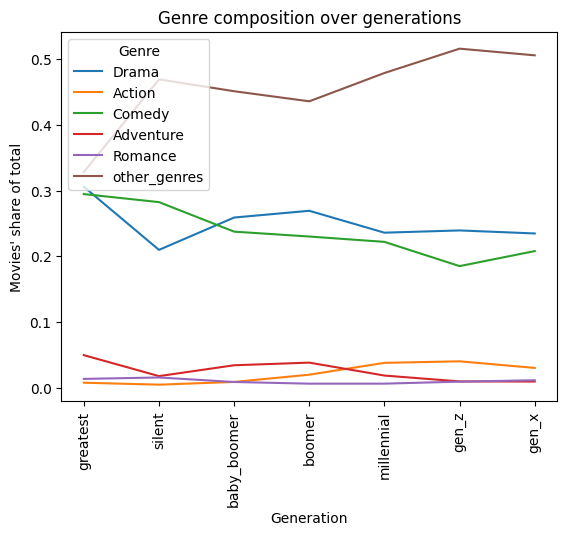

In [7]:
# plot share of movies per selected genre for each generation as mosaik
for genre in selected_genres + ["other_genres"]:
    plt.plot(count_selected_genres_in_generation["generation"], count_selected_genres_in_generation[genre]/count_selected_genres_in_generation["total_movie_amount"], label = genre)
plt.ylabel("Movies' share of total")
plt.xlabel("Generation")
plt.legend(title = "Genre", loc="upper left")
plt.title("Genre composition over generations")
plt.xticks(rotation=90)
plt.show()

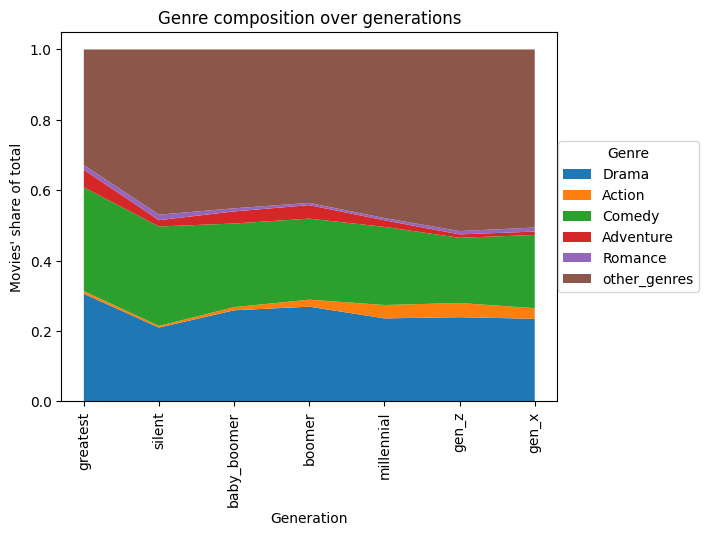

In [8]:
# staked plot of upper plot
y = []

# TODO sort by share size of genre in the first generation: sorted_count_selected_genres_in_generation = count_selected_genres_in_generation.sort_values(by="0", axis=1)
for genre in selected_genres + ["other_genres"]:
    y.append(count_selected_genres_in_generation[genre]/count_selected_genres_in_generation["total_movie_amount"])

plt.stackplot(count_selected_genres_in_generation["generation"], y, labels=selected_genres + ["other_genres"])
plt.ylabel("Movies' share of total")
plt.xlabel("Generation")
plt.legend(title = "Genre", loc='center right', bbox_to_anchor=(1.3, 0.5))
plt.title("Genre composition over generations")
plt.xticks(rotation=90)
plt.show()

## Creating weights based on different success metrics for movies for actor profile analysis
To incooperate success of movies into actor profile analysis and thus making it interesting for producers who seek a cast which create successfull movies.

Used weights:
1. no weight
2. numVotes (= popularity/trendingness)
3. imdb score (= opinion)
4. 0.8 * numVotes + 0.2 imdb score (= considering opinion of viewers and overall popularity with an emphasis on opinion)

In [9]:
# creating a column for "opinion and popularity" success metric
selected_movie_actor_combi["opinion_and_popularity"] = 0.8 * selected_movie_actor_combi["averageRating"] + 0.2 * selected_movie_actor_combi["numVotes"]

C:\Users\sidla\AppData\Local\Temp\ipykernel_7040\3740995829.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_movie_actor_combi["opinion_and_popularity"] = 0.8 * selected_movie_actor_combi["averageRating"] + 0.2 * selected_movie_actor_combi["numVotes"]


## Analysis of (successfull) actor profiles over time using different weights of movie success

In [10]:
selected_features = ["gender", "age_at_movie_start", "exp_so_far"]

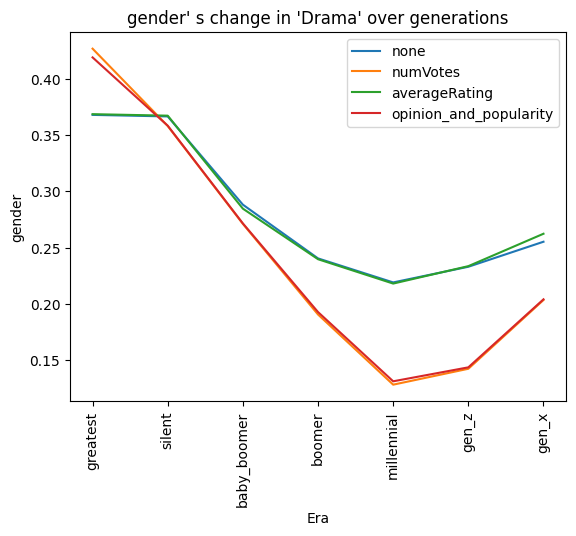

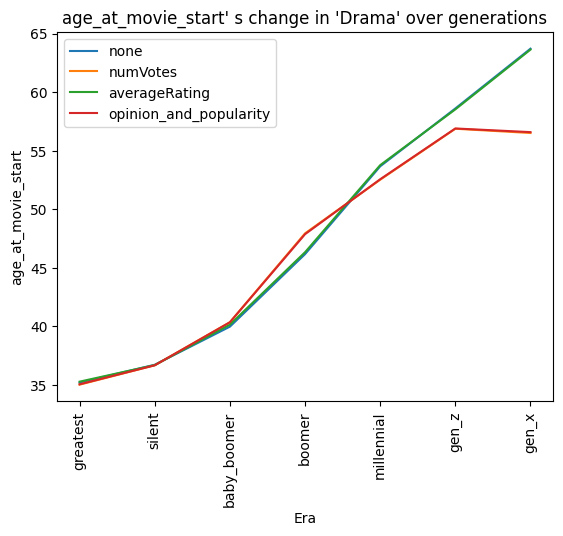

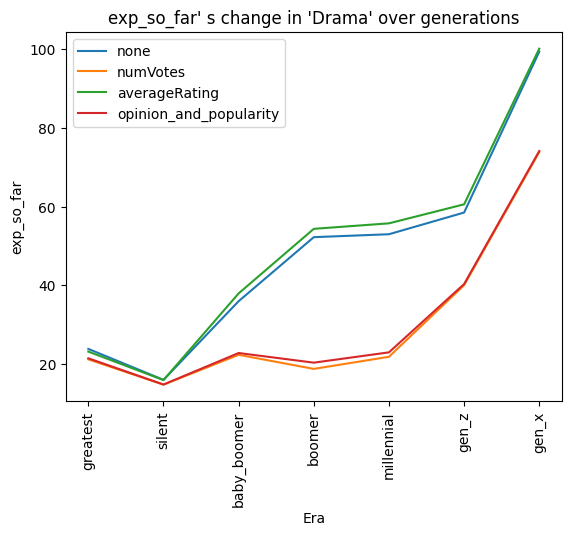

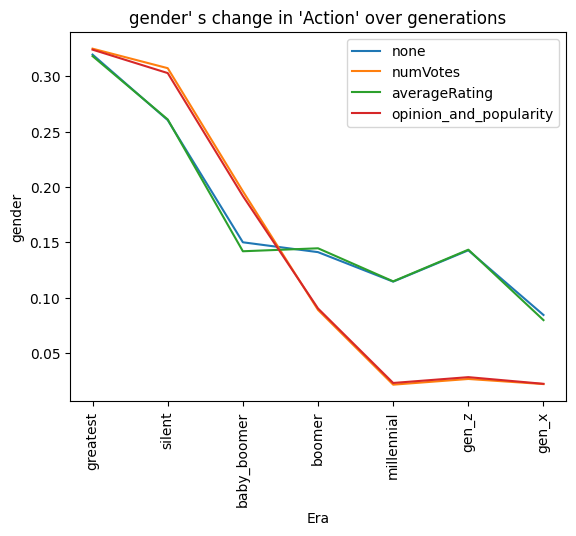

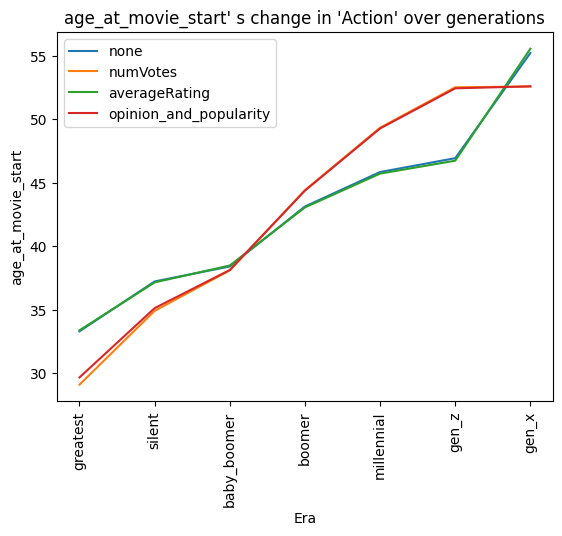

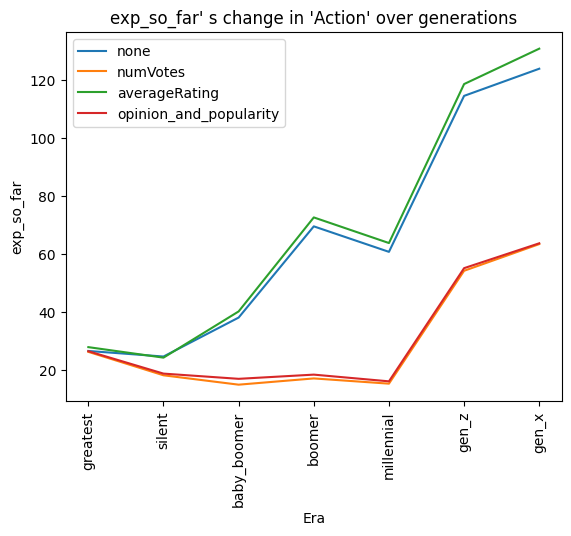

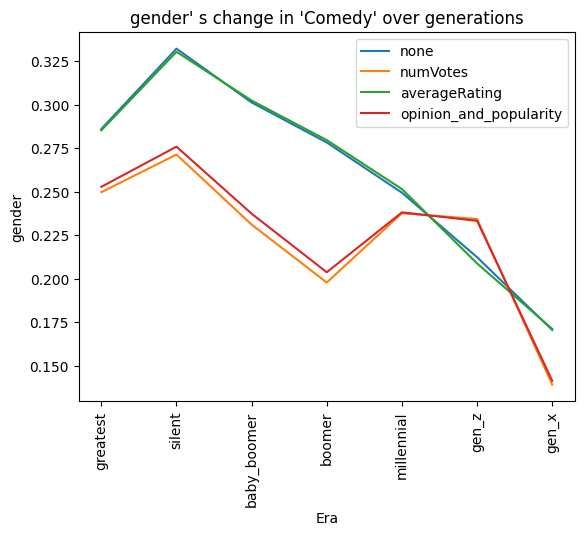

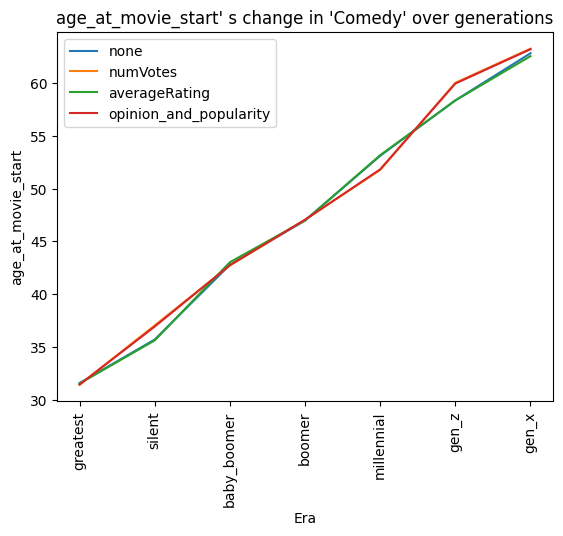

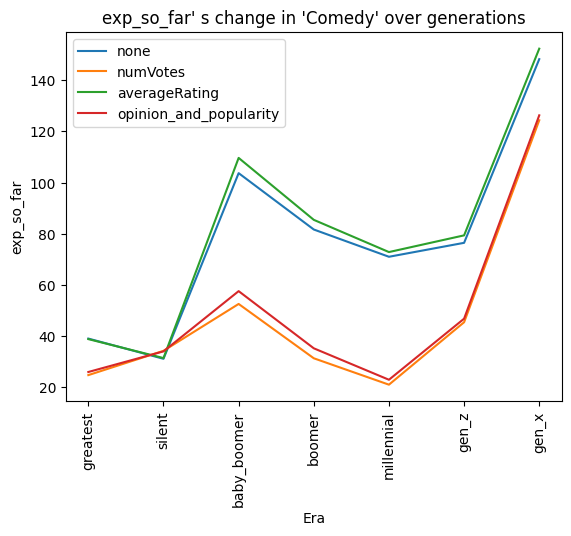

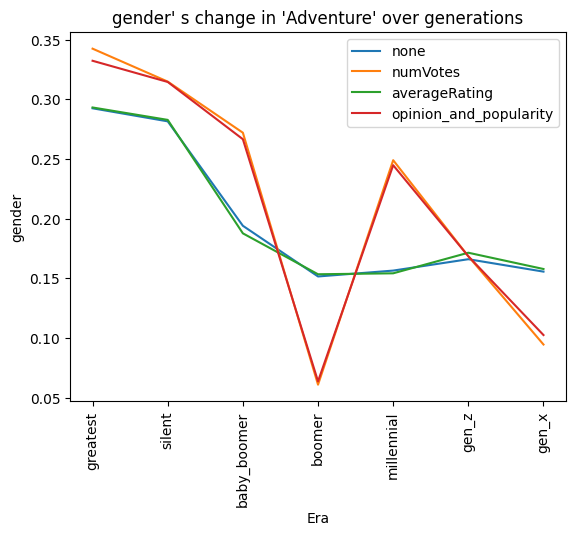

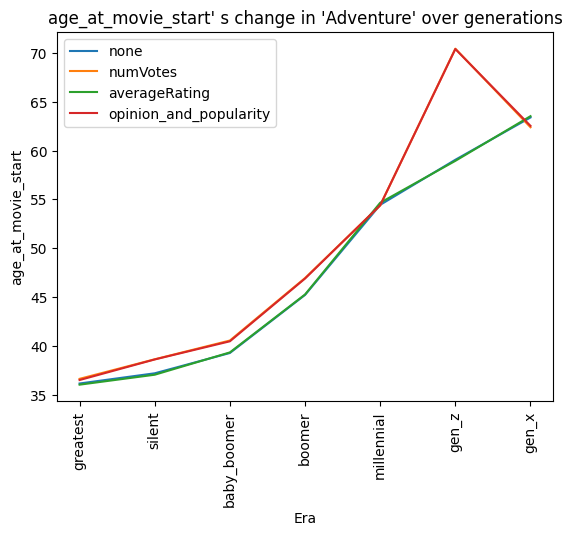

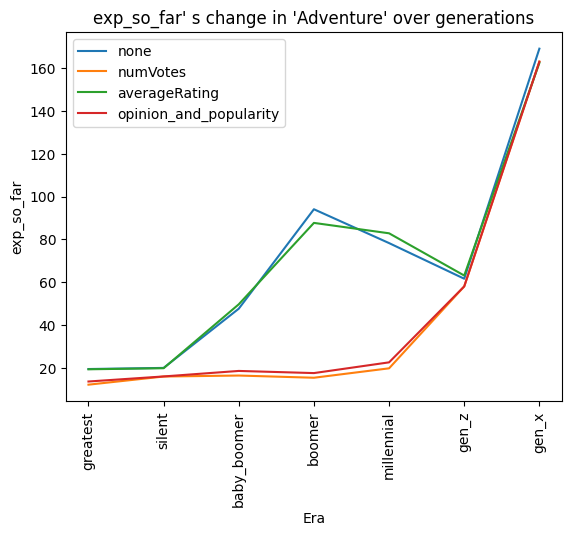

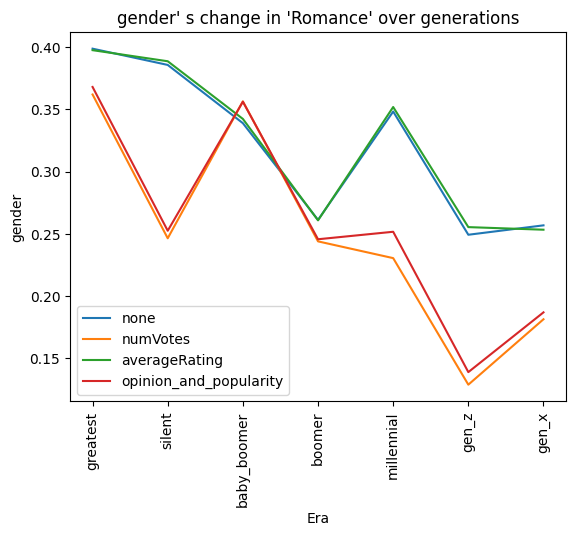

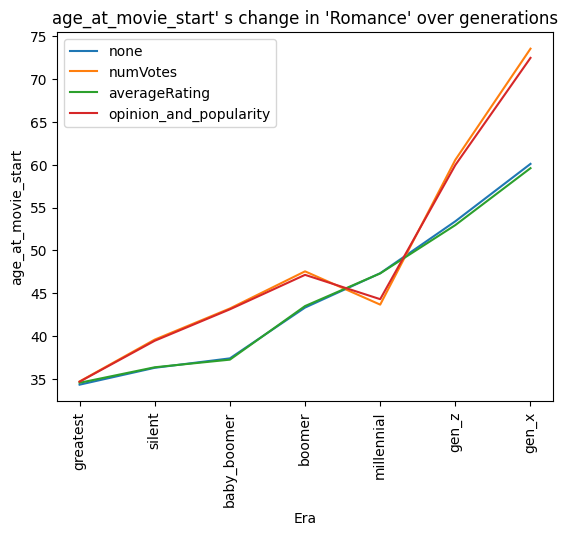

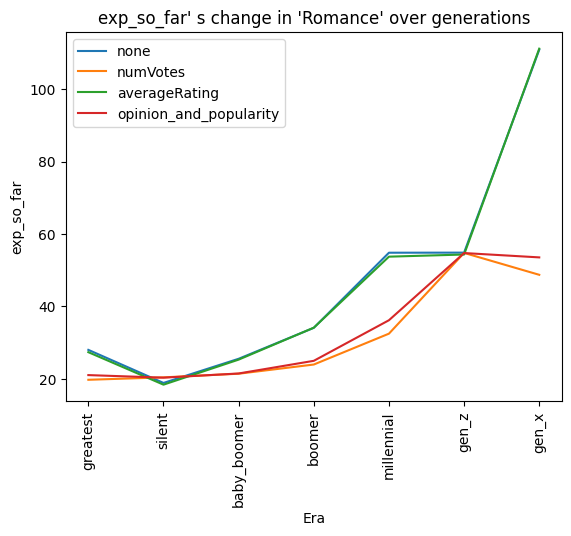

In [11]:
# analyse selected features of actors in selected genres over generations (using average or weighted averages)

# helper variables and functions
weights = ["none", "numVotes", "averageRating", "opinion_and_popularity"]

def weighted_average(x, values, weights):
    return sum(x[weights] * x[values]) / x[weights].sum()

# analyse for each selected genre
for genre in selected_genres:

    # filter for genre in selected genres
    movie_actor_combi_filtered_by_genre = selected_movie_actor_combi[selected_movie_actor_combi[genre] == 1]

    # run feature analysis over generation for genre 
    for feature in selected_features:

        # analyse using different weights
        for weight in weights:
            if "none" == weight:
                avg_movie_actor_combi_per_generation = movie_actor_combi_filtered_by_genre.groupby("generation").mean().reset_index()
            else:
                avg_movie_actor_combi_per_generation = movie_actor_combi_filtered_by_genre.groupby("generation").apply(lambda x : weighted_average(x, feature, weight)).to_frame(name=feature).reset_index()
            
            avg_movie_actor_combi_per_generation = sortByGeneration(avg_movie_actor_combi_per_generation)
            plt.plot(avg_movie_actor_combi_per_generation["generation"], avg_movie_actor_combi_per_generation[feature], label=weight) 
            
        plt.title(feature+"' s change in '"+genre+"' over generations")
        plt.ylabel(feature)
        plt.xlabel("Era")
        plt.xticks(rotation=90)
        plt.legend()
        plt.show()

### Interpretation and concerns
1. Interpretation

2. Concerns
    - age always compounds up --> there has to be an error
    - non-weighted average and average weighted with imdb score more or less the same --> why?
    - opininon_and_popularity should be in the middle of numVotes and averageRating. However, it follows numVotes more (although it was weighted down) --> que?
    - concern about how gender is analysed:

## Visualise actor feature change over generations for each genre
Since weighting the average with any success metrics does not really matter, we are not considering a movie success metric for the following visuals. This means that we cannot say that those are the profiles of successfull actors.

In [12]:
import warnings
warnings.filterwarnings('ignore')

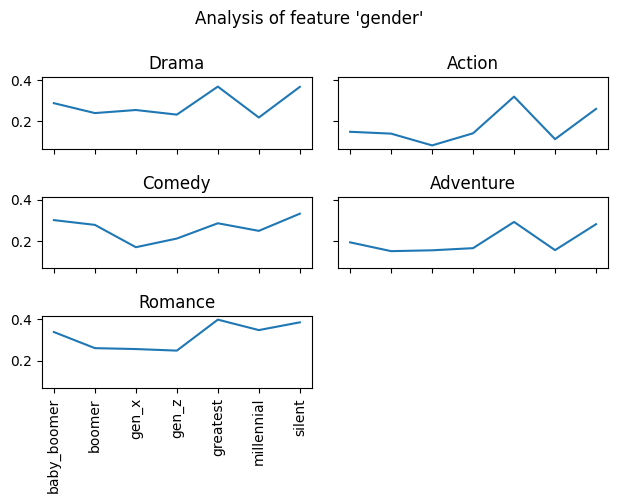

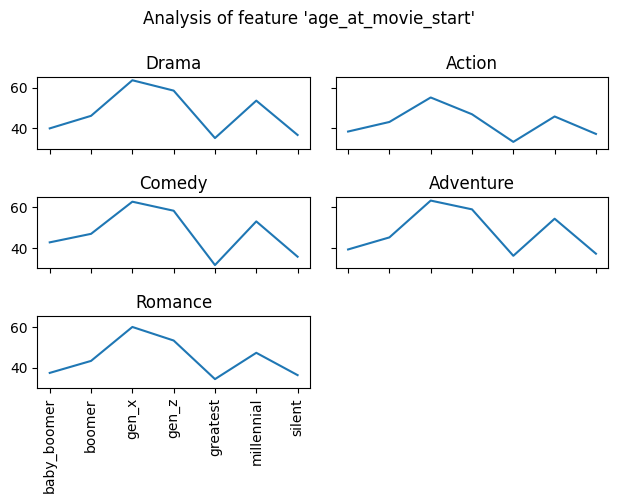

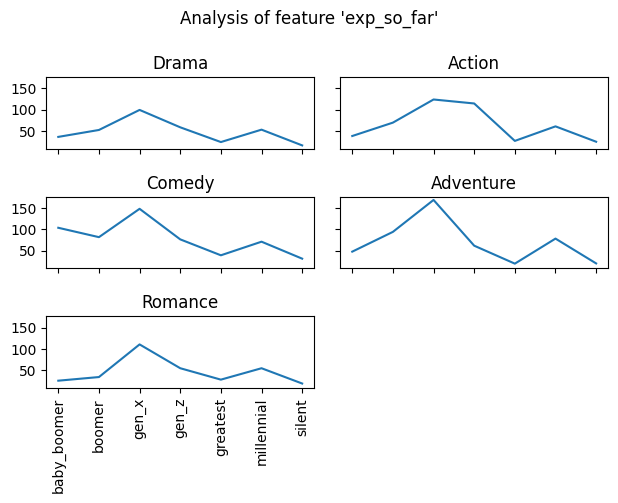

In [19]:
for feature in selected_features:   

    if len(selected_genres) % 2 == 1:
        fig, axs = plt.subplots(int(len(selected_genres)/2)+1, 2, sharex=True, sharey=True)
        fig.delaxes(axs[int(len(selected_genres)/2), 1])
    else:
        fig, axs = plt.subplots(len(selected_genres)/2, 2, sharex=True, sharey=True)

    x_len = 0
    y_len = 0
        
    for idx, genre in enumerate(selected_genres):   
        avg_selected_movie_actor_combi_by_genre = selected_movie_actor_combi.groupby("generation").apply(lambda x: x[x[genre] == 1].mean()).reset_index()
        axs[y_len, x_len].plot(avg_selected_movie_actor_combi_by_genre["generation"], avg_selected_movie_actor_combi_by_genre[feature])
        axs[y_len, x_len].set_title(genre)
        axs[y_len, x_len].tick_params(axis='x', rotation= 90)

        if idx%2 == 0:
            x_len += 1
        else:
            y_len += 1
            x_len = 0

    # Hide x labels and tick labels for top plots and y ticks for right plots.
    for ax in axs.flat:
        ax.label_outer()

    # add title
    fig.tight_layout(pad=1.5) # improve spacing
    fig.suptitle("Analysis of feature '"+feature+"'", y=1.05)
    

In [20]:
# visualise using plotly
!{sys.executable} -m pip install plotly.express
import plotly.express as px

In [ ]:
# TODO make upper plots nice with plotly
df = px.data.stocks()
fig = px.line(df, x="date", y=df.columns,
              hover_data={"date": "|%B %d, %Y"},
              title='custom tick labels with ticklabelmode="period"')
fig.update_xaxes(
    dtick="M1",
    tickformat="%b\n%Y",
    ticklabelmode="period")
fig.show()

## Visualise change in features of actors and actresses over generations for each genre